## Importing Libraries

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [197]:
df = pd.read_csv("/content/Trending_Movies.csv")

In [198]:
df.head()

,id,title,original_title,overview,adult,original_language,popularity,release_date,vote_average,vote_count
0,1098006,Fountain of Youth,Fountain of Youth,A treasure-hunting mastermind assembles a team...,False,en,221.1354,2025-05-19,6.900,105
1,1232546,Until Dawn,Until Dawn,One year after her sister Melanie mysteriously...,False,en,287.8015,2025-04-23,6.360,283
2,1001414,Fear Street: Prom Queen,Fear Street: Prom Queen,Who will be voted queen at Shadyside High's 19...,False,en,215.8355,2025-05-23,5.361,101
3,575265,Mission: Impossible - The Final Reckoning,Mission: Impossible - The Final Reckoning,Ethan Hunt and team continue their search for ...,False,en,325.1914,2025-05-17,7.026,253
4,574475,Final Destination Bloodlines,Final Destination Bloodlines,"Plagued by a violent recurring nightmare, coll...",False,en,535.0346,2025-05-09,7.078,392


In [199]:
df.tail()

,id,title,original_title,overview,adult,original_language,popularity,release_date,vote_average,vote_count
9995,1465248,TNA Rebellion 2025,TNA Rebellion 2025,The 2025 Rebellion was a professional wrestlin...,False,en,0.6146,2025-04-27,7.0,1
9996,1465243,I Am Legend -Alternate,I Am Legend -Alternate,ALTERNATE ENDING VERSION. Robert Neville is a ...,False,en,0.1985,2007-01-01,0.0,0
9997,1465066,El Titán: The Adrián González Story,El Titán: The Adrián González Story,"MLB star Adrián González from Tijuana, followi...",False,en,0.1201,2023-06-14,0.0,0
9998,1464945,Happiness,Happiness,Sleeping disorders are omnipresent in this day...,False,en,0.0470,NaN,0.0,0
9999,1464838,8%,8%,NaN,False,pl,0.0655,2022-04-04,0.0,0


In [200]:
df.shape

(10000, 10)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   original_title     10000 non-null  object 
 3   overview           9747 non-null   object 
 4   adult              10000 non-null  bool   
 5   original_language  10000 non-null  object 
 6   popularity         10000 non-null  float64
 7   release_date       9844 non-null   object 
 8   vote_average       10000 non-null  float64
 9   vote_count         10000 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 713.0+ KB


In [202]:
df.describe()

,id,popularity,vote_average,vote_count
count,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,4.625025e+05,4.631769,5.887856,1559.778400
std,4.942435e+05,15.184650,2.177695,3301.728785
min,2.000000e+00,0.000000,0.000000,0.000000
25%,1.664975e+04,0.867400,5.629000,17.000000
50%,2.880495e+05,2.166850,6.490000,241.000000
75%,8.601888e+05,4.739300,7.108250,1489.250000
max,1.487123e+06,694.967300,10.000000,37480.000000


In [203]:
df.isnull().sum()

,0
id,0
title,0
original_title,0
overview,253
adult,0
original_language,0
popularity,0
release_date,156
vote_average,0
vote_count,0


## Removing Duplicates in id column

In [204]:
df['id']

,id
0,1098006
1,1232546
2,1001414
3,575265
4,574475
...,...
9995,1465248
9996,1465243
9997,1465066
9998,1464945


In [205]:
df.id.nunique()

9791

In [206]:
df.drop_duplicates(subset='id',keep='first',inplace=True)

In [207]:
df.shape

(9791, 10)

## Removing duplicates in title column

In [208]:
df['title']

,title
0,Fountain of Youth
1,Until Dawn
2,Fear Street: Prom Queen
3,Mission: Impossible - The Final Reckoning
4,Final Destination Bloodlines
...,...
9995,TNA Rebellion 2025
9996,I Am Legend -Alternate
9997,El Titán: The Adrián González Story
9998,Happiness


In [209]:
df['title'].nunique()

9434

In [210]:
duplicates_df = df[df['title'].duplicated(keep=False)].sort_values('title')
duplicates_df

,id,title,original_title,overview,adult,original_language,popularity,release_date,vote_average,vote_count
956,389,12 Angry Men,12 Angry Men,The defense and the prosecution have rested an...,False,en,15.8763,1957-04-10,8.548,9132
9013,12219,12 Angry Men,12 Angry Men,During the trial of a man accused of his fathe...,False,en,3.1958,1997-08-17,7.700,393
2539,173,"20,000 Leagues Under the Sea","20,000 Leagues Under the Sea",A ship sent to investigate a wave of mysteriou...,False,en,2.6516,1954-12-23,7.000,910
5133,30266,"20,000 Leagues Under the Sea","20,000 Leagues Under the Sea",Captain Nemo has built a fantastic submarine f...,False,en,0.5405,1916-12-24,6.200,57
5729,1197287,A Bee's Diary,A Bee's Diary,Scientists are learning that each bee in a hiv...,False,hr,0.0664,2022-02-23,0.000,0
...,...,...,...,...,...,...,...,...,...,...
6861,527280,You Are the Apple of My Eye,あの頃、君を追いかけた,Kosuke Mizushima is a high school student at a...,False,ja,0.9270,2018-10-05,5.700,22
2628,1290182,You Are the Apple of My Eye,"그 시절, 우리가 좋아했던 소녀",A group of close friends who attend a private ...,False,ko,5.1854,2025-02-21,8.200,6
7970,84111,You Are the Apple of My Eye,那些年，我們一起追的女孩,A group of close friends who attend a private ...,False,zh,1.8762,2011-08-19,7.394,212
2877,128975,Zero Tolerance,Zero Tolerance,After surviving a sneak attack on himself and ...,False,en,0.4488,1994-06-09,5.200,12


In [211]:
df.drop_duplicates(subset='title',keep='first',inplace=True)

In [212]:
df.shape

(9434, 10)

In [213]:
df['original_title']

,original_title
0,Fountain of Youth
1,Until Dawn
2,Fear Street: Prom Queen
3,Mission: Impossible - The Final Reckoning
4,Final Destination Bloodlines
...,...
9995,TNA Rebellion 2025
9996,I Am Legend -Alternate
9997,El Titán: The Adrián González Story
9998,Happiness


## Handling Missing Values in overview Column

In [214]:
df['overview']

,overview
0,A treasure-hunting mastermind assembles a team...
1,One year after her sister Melanie mysteriously...
2,Who will be voted queen at Shadyside High's 19...
3,Ethan Hunt and team continue their search for ...
4,"Plagued by a violent recurring nightmare, coll..."
...,...
9995,The 2025 Rebellion was a professional wrestlin...
9996,ALTERNATE ENDING VERSION. Robert Neville is a ...
9997,"MLB star Adrián González from Tijuana, followi..."
9998,Sleeping disorders are omnipresent in this day...


In [215]:
df['overview'] = df['overview'].fillna("No overview available")

In [216]:
df['overview']

,overview
0,A treasure-hunting mastermind assembles a team...
1,One year after her sister Melanie mysteriously...
2,Who will be voted queen at Shadyside High's 19...
3,Ethan Hunt and team continue their search for ...
4,"Plagued by a violent recurring nightmare, coll..."
...,...
9995,The 2025 Rebellion was a professional wrestlin...
9996,ALTERNATE ENDING VERSION. Robert Neville is a ...
9997,"MLB star Adrián González from Tijuana, followi..."
9998,Sleeping disorders are omnipresent in this day...


In [217]:
df.isnull().sum()

,0
id,0
title,0
original_title,0
overview,0
adult,0
original_language,0
popularity,0
release_date,139
vote_average,0
vote_count,0


In [218]:
df['adult']

,adult
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [219]:
df['original_language']

,original_language
0,en
1,en
2,en
3,en
4,en
...,...
9995,en
9996,en
9997,en
9998,en


In [220]:
df['original_language'].unique()

array(['en', 'sv', 'hi', 'zh', 'ru', 'fa', 'no', 'pt', 'fr', 'id', 'ko',
       'ja', 'cs', 'de', 'it', 'te', 'th', 'da', 'es', 'cn', 'uk', 'nl',
       'tl', 'ga', 'gl', 'lv', 'pl', 'tr', 'ms', 'ta', 'ml', 'ca', 'fi',
       'xx', 'kk', 'vi', 'ar', 'sr', 'et', 'ro', 'mk', 'mn', 'hu', 'pa',
       'is', 'kn', 'uz', 'ho', 'he', 'el', 'mr', 'bn', 'jv', 'az', 'my',
       'km', 'ur', 'sq', 'hr', 'mi', 'ht', 'yi', 'ka', 'gu', 'st', 'bg',
       'la', 'sh', 'af', 'lt', 'bs'], dtype=object)

In [221]:
df['popularity']

,popularity
0,221.1354
1,287.8015
2,215.8355
3,325.1914
4,535.0346
...,...
9995,0.6146
9996,0.1985
9997,0.1201
9998,0.0470


## Handling Missing values in release date column

In [222]:
df['release_date']

,release_date
0,2025-05-19
1,2025-04-23
2,2025-05-23
3,2025-05-17
4,2025-05-09
...,...
9995,2025-04-27
9996,2007-01-01
9997,2023-06-14
9998,NaN


In [223]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
median_year = int(df['release_date'].dt.year.median())
df['release_date'] = df['release_date'].fillna(pd.Timestamp(f'{median_year}-01-01'))

In [224]:
df.shape

(9434, 10)

In [225]:
df.isnull().sum()

,0
id,0
title,0
original_title,0
overview,0
adult,0
original_language,0
popularity,0
release_date,0
vote_average,0
vote_count,0


In [226]:
df['vote_average']

,vote_average
0,6.900
1,6.360
2,5.361
3,7.026
4,7.078
...,...
9995,7.000
9996,0.000
9997,0.000
9998,0.000


In [227]:
df['vote_count']

,vote_count
0,105
1,283
2,101
3,253
4,392
...,...
9995,1
9996,0
9997,0
9998,0


## 1. Top 10 Languages by Movie Count

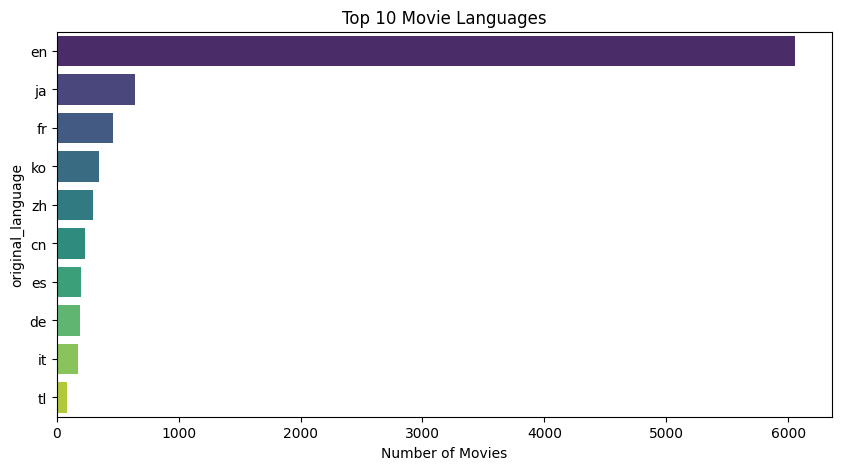

In [228]:
top_languages = df['original_language'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_languages.values, y=top_languages.index,hue=top_languages.index, palette='viridis',legend=False)
plt.title('Top 10 Movie Languages')
plt.xlabel('Number of Movies')
plt.show()

## 2. Top 10 Most Common Release Years

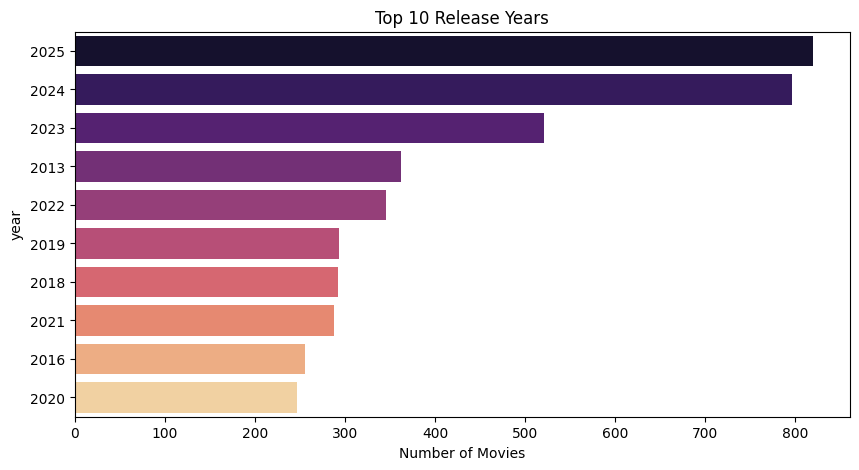

In [229]:
df['year'] = df['release_date'].apply(lambda x: str(x)[:4] if x != 'Unknown' else np.nan)
top_years = df['year'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_years.values, y=top_years.index,hue=top_years.index, palette='magma',legend=False)
plt.title('Top 10 Release Years')
plt.xlabel('Number of Movies')
plt.show()

## 3.Top 10 Movies by Vote Count

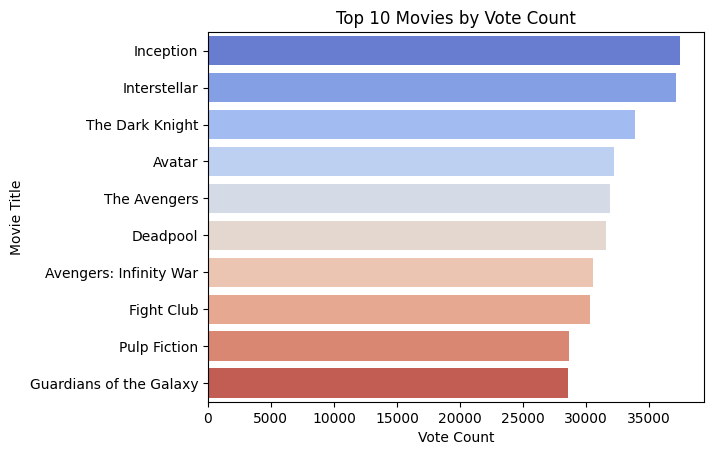

In [230]:
top_votes = df.sort_values('vote_count', ascending=False).head(10)

sns.barplot(x=top_votes['vote_count'], y=top_votes['title'],hue=top_votes['title'], palette='coolwarm')
plt.title('Top 10 Movies by Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.show()


## 4. Vote Count vs Popularity

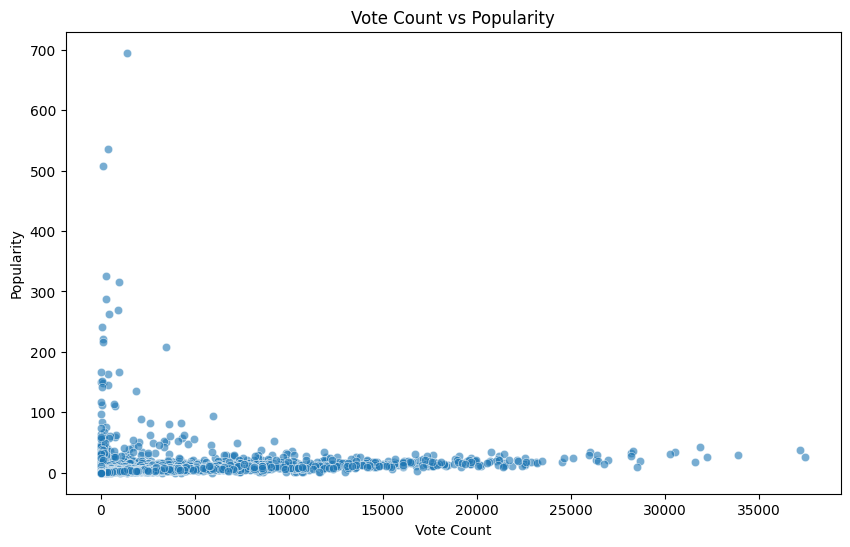

In [231]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_count', y='popularity', data=df, alpha=0.6)
plt.title('Vote Count vs Popularity')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.show()

## 5. Average Popularity per Language (Top 10)

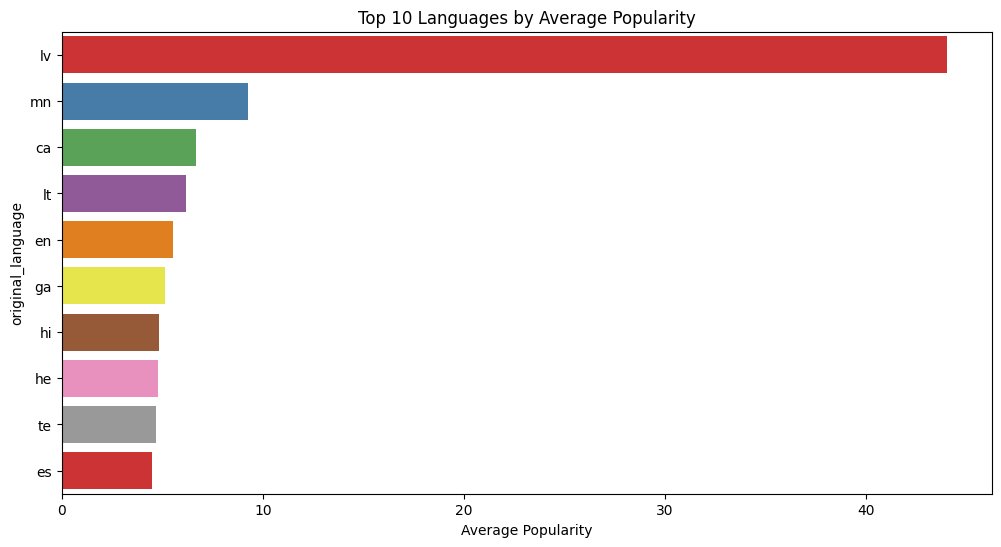

In [232]:
avg_pop_lang = df.groupby('original_language')['popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_pop_lang.values, y=avg_pop_lang.index,hue=avg_pop_lang.index,legend=False,palette='Set1')
plt.title('Top 10 Languages by Average Popularity')
plt.xlabel('Average Popularity')
plt.show()

# Final Conclusions:
1.   Most Common Original Languages

*   The majority of trending movies are in English, followed by languages like French, Japanese, and Hindi.
*   This suggests a strong global influence from English-speaking film industries.


2.   Release Date Distribution

*   A large number of trending movies have been released in the last decade, showing that recent content dominates popularity.
*   Missing or invalid release dates have been cleaned or filled for accurate time-based trends.


3.   Popularity vs Vote Average

*   Highly popular movies don't always have the highest average ratings.
*   Popularity can be influenced by marketing, genre, or recency, while ratings reflect quality perceptions.


4.   Popular Movies(By Vote Counts)

*   The top 10 voted movies are well-known blockbusters or critically acclaimed titles, often internationally recognized.
*   These movies tend to have both high popularity and high vote averages, reflecting strong audience engagement.











